<a href="https://colab.research.google.com/github/aritra31/Twitter-Sentiment-Analysis/blob/main/TSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing necessary packages

In [ ]:
#Web Scraping
!pip install -q snscrape
!pip install twython
#Import Data
import pandas as pd
import numpy as np
# Text Preprocessing
import nltk
import re
import string
from nltk.corpus import stopwords
#Data visualization
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
#Tallying score of the model
import sklearn
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# ***Do not run the below cells as dataset has already been generated***

In [ ]:
import snscrape.modules.twitter as sntwitter

query = "ukraine-russia war (against ukraine OR for ukraine AND against war OR for war) lang:en"
tweets = []
limit = 3000


for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.content])
        
df = pd.DataFrame(tweets, columns=['Tweets'])
print(df)
df.to_csv('tweets.csv')

# Uploaded the manually annotated dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving tweets2.csv to tweets2.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['tweets2.csv']))
# Dataset is now stored in a Pandas Dataframe
df.head()

,Tweets,Support,War
0,So is #USA waging a proxy war against Russia i...,Russia,No
1,I am so confused. At this moment nobody talks ...,Ukraine,No
2,"""Women are ""the biggest victims of Putin's war...",Ukraine,No
3,"Are there US Airforce and troops, Command and...",Russia,No
4,How would the international community respond ...,Ukraine,No


# **Pre-processing of data**

In [ ]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))
def cleanTxt(text):
  text = str(text).lower()#convert all to lower
  text = re.sub('@[A-Za-z0–9]+', '', text) #Remove @mentions
  text = re.sub('#', '', text) # Remove '#' hash tag
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\n', '', text)
  text = [word for word in text.split(' ') if word not in stopword]#remove stopwords
  text=" ".join(text)
  text = [stemmer.stem(word) for word in text.split(' ')]#extract stem words
  text=" ".join(text)
  text = re.sub('RT[\s]+', '', text) # Remove Retweets
  text = re.sub('https?:\/\/\S+', '', text) # Remove hyperlink
  return text

# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Tweets,Support,War
0,usa wage proxi war russia ukrain answer cheap ...,Russia,No
1,confus moment nobodi talk ukrain russia war me...,Ukraine,No
2,women biggest victim putin war easiest target ...,Ukraine,No
3,us airforc troop command control ukrain russi...,Russia,No
4,would intern communiti respond russian declar ...,Ukraine,No


In [ ]:
# Function to get the subjectivity
def Subjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Function to get the polarity
def Polarity(text):
   return  TextBlob(text).sentiment.polarity
   
# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(Subjectivity)
df['Polarity'] = df['Tweets'].apply(Polarity)
#Show the new dataframe
df.head()

,Tweets,Support,War,Subjectivity,Polarity
0,usa wage proxi war russia ukrain answer cheap ...,Russia,No,0.70000,0.40000
1,confus moment nobodi talk ukrain russia war me...,Ukraine,No,0.60000,0.70000
2,women biggest victim putin war easiest target ...,Ukraine,No,0.02500,-0.03750
3,us airforc troop command control ukrain russi...,Russia,No,0.68750,-0.31250
4,would intern communiti respond russian declar ...,Ukraine,No,0.34375,-0.15625


# Sentiment Analysis based on Tweets

In [ ]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["Tweets"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["Tweets"]]
df.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Tweets,Support,War,Subjectivity,Polarity,Positive,Negative
0,usa wage proxi war russia ukrain answer cheap ...,Russia,No,0.70000,0.40000,0.221,0.279
1,confus moment nobodi talk ukrain russia war me...,Ukraine,No,0.60000,0.70000,0.191,0.477
2,women biggest victim putin war easiest target ...,Ukraine,No,0.02500,-0.03750,0.092,0.451
3,us airforc troop command control ukrain russi...,Russia,No,0.68750,-0.31250,0.173,0.250
4,would intern communiti respond russian declar ...,Ukraine,No,0.34375,-0.15625,0.000,0.178


# Data visualization

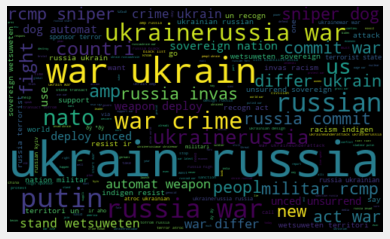

In [ ]:
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

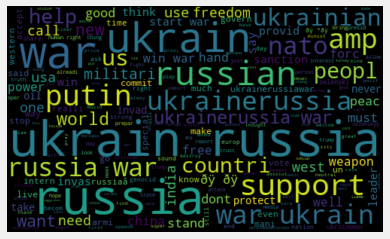

(3043, 7)

In [ ]:
positive_sent =' '.join([i for i in df['Tweets'][df['Positive'] > df["Negative"]]])
wordCloud = WordCloud(width=500, height=300, max_font_size=110).generate(positive_sent)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()
df.shape

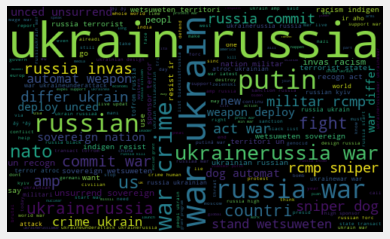

In [ ]:
negative_sent =' '.join([i for i in df['Tweets'][df['Negative'] > df["Positive"]]])
wordCloud = WordCloud(width=500, height=300, max_font_size=110).generate(negative_sent)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
print('Count of war positive tweets:\n')
j=1
sum = 0
sorted_data = df.sort_values(by=['War']) #Sort the tweets
for i in range(0, sorted_data.shape[0] ):
  if(sorted_data['War'][i] == 'Yes'):
    sum = sum + 1
    j= j+1
print(sum)

Count of war positive tweets:

730


In [ ]:
print('Count of war negative tweets:\n')
j=1
sum = 0
sorted_data = df.sort_values(by=['War']) #Sort the tweets
for i in range(0, sorted_data.shape[0] ):
  if(sorted_data['War'][i] == 'No'):
    sum = sum + 1
    j= j+1
print(sum)

Count of war negative tweets:

2313


In [ ]:
print('Count of tweets in support of Russia:\n')
j=1
sum = 0
sorted_data = df.sort_values(by=['Support']) #Sort the tweets
for i in range(0, sorted_data.shape[0] ):
  if(sorted_data['Support'][i] == 'Russia'):
    sum = sum + 1
    j= j+1
print(sum)

Count of tweets in support of Russia:

609


In [ ]:
print('Count of tweets in support of Ukraine:\n')
j=1
sum = 0
sorted_data = df.sort_values(by=['Support']) #Sort the tweets
for i in range(0, sorted_data.shape[0] ):
  if(sorted_data['Support'][i] == 'Ukraine'):
    sum = sum + 1
    j= j+1
print(sum)

Count of tweets in support of Ukraine:

2434


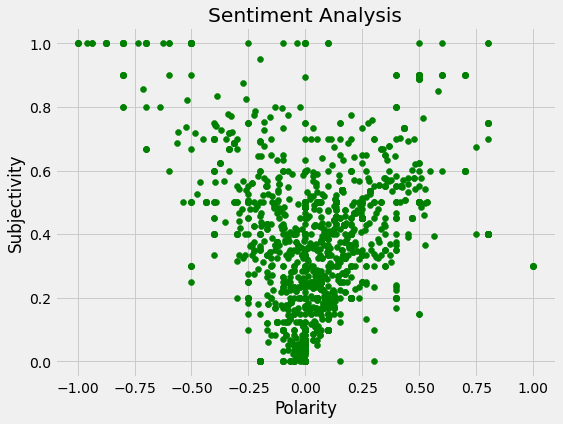

In [ ]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Green') 
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

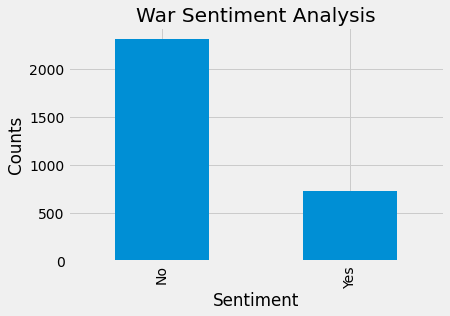

In [ ]:
# Plotting and visualizing the counts
plt.title('War Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['War'].value_counts().plot(kind = 'bar')
plt.show()

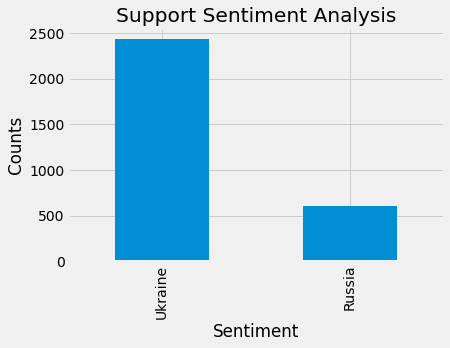

In [ ]:
# Plotting and visualizing the counts
plt.title('Support Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Support'].value_counts().plot(kind = 'bar')
plt.show()

# Prediction using Machine Learning Algorithm



1.   Feature Extraction and Vectorization



In [ ]:
corpus1 = list(df['Tweets'])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(corpus1)
X_train_counts.shape

(3043, 9658)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_train_tf.shape

(3043, 9658)



2. Here, we will take two cases, one with a target as 'Support' column and the other with 'War' 



In [ ]:
y = list(df['Support'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_tf, y, test_size = 0.20, random_state = 0)

# Data Feeding to the model

In the following step, we feed the selected data to our model, SVM.
SDG Classifier by default holds the following characteristics:


> The model it fits can be controlled with the loss parameter..The loss function defaults to ‘hinge’, which gives a linear SVM.

> SGD is an approximation algorithm like taking single points and as the number of point increases it converses more to the optimal solution. Therefore, it is mostly used when the dataset is large.


> The regularizer is a penalty added to the loss function that shrinks model parameters towards the zero vector

We used SVM specifically over Multinomial Naive Bayes or other models due to better performance and accuracy achieved. It gives an excellent result for text categorization tasks such as sentiment analysis  By using the correct kernel and setting an optimum set of parameters.



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss='hinge', penalty='l2',
                          alpha=1e-3, random_state=42,
                          max_iter=5, tol=None)),
])

text_clf.fit(corpus1, y)
docs_test = corpus1
predicted = text_clf.predict(docs_test)

3. We tally the score of the model via Accuracy and F1 score

In [ ]:
print("\nF1 Score: {:.2f}".format(f1_score(y, predicted, average='micro') * 100))
print("Accuracy: {:.2f}%".format(accuracy_score(y, predicted) * 100))


F1 Score: 79.99
Accuracy: 79.99%


In [ ]:
print(sklearn.metrics.confusion_matrix(y, predicted,labels=["Russia", "Ukraine"], normalize="true"))

[[0. 1.]
 [0. 1.]]


We repeat the step as for the reason stated previously

In [ ]:
y = list(df['War'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_tf, y, test_size = 0.20, shuffle = True, random_state = 0)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss='hinge', penalty='l2',
                          alpha=1e-3, random_state=42,
                          max_iter=5, tol=None)),
])

text_clf.fit(corpus1, y)
docs_test = corpus1
predicted = text_clf.predict(docs_test)

4. We tally the score of the model via Accuracy and F1 score

In [ ]:
from sklearn import metrics
print("\nF1 Score: {:.2f}".format(f1_score(y, predicted, average='micro') * 100))
print("Accuracy: {:.2f}%".format(accuracy_score(y, predicted) * 100))


F1 Score: 76.01
Accuracy: 76.01%


The model results have been achieved with SVM

# Checking accuracy with other models

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_recall_fscore_support as score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
models_list = [LGBMClassifier(objective='binary'),
               ),
               RandomForestClassifier(random_state=42,n_jobs=-1),
               GaussianNB(),KNeighborsClassifier(n_jobs=-1)]
models_name = ['Light Gradient Boosting','Extreme Gradient Boosting','Random Forest Classifier','Gaussian Naïve Bayes','K-Nearest Neighbor']
accuracy_list =[]XGBClassifier(objective='binary:logistic',random_state=42
results_dict = {}

for model in range(len(models_list)):
    classifier= models_list[model]
    classifier.fit(X_train.toarray(),y_train)
    response_predict=classifier.predict(X_test.toarray())
    accuracy_list.append(accuracy_score(y_test,response_predict)) 
       
results_dict={"Models Name":models_name,'Accuracy Score':accuracy_list}
results_df=pd.DataFrame(results_dict).sort_values(by='Accuracy Score',ascending=False)
results_df

,Models Name,Accuracy Score
1,Extreme Gradient Boosting,0.766831
2,Random Forest Classifier,0.758621
0,Light Gradient Boosting,0.745484
4,K-Nearest Neighbor,0.743842
3,Gaussian Naïve Bayes,0.532020


As we see, results with SVM provides the best accuracy based on the data provided